In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu, pearsonr
from collections import Counter
import re
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Этот метод оставляет только английские слова

In [ ]:
def keep_english_and_russian(text: str) -> str:
  cleaned_text = re.sub(r'[^a-zA-Zа-яА-Я\s]', '', text)
  return cleaned_text

In [ ]:
df = pd.read_csv('/content/most_watched_600_youtube_videos_2024.csv')
df

,title,published_at,duration,view_count,like_count,comment_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,PT25S,39972377,1143891.0,8254.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,PT37S,37983493,1239925.0,2823.0
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24T05:17:00Z,PT1M1S,29605580,938530.0,691.0
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17T14:14:43Z,PT58S,22825107,438667.0,241.0
4,The success of people depends on their life co...,2024-01-24T09:00:30Z,PT56S,21029074,348898.0,1500.0
...,...,...,...,...,...,...
593,కేసీఆర్ ఏం చేయబోతున్నడు..ముందే చెప్పేసిన మల్లన...,2024-02-20T06:23:10Z,PT7M14S,109855,1969.0,257.0
594,The BEST feeling in the World!! I know I’ll mi...,2024-02-19T18:12:55Z,PT7S,54557,4659.0,132.0
595,Chinese burger with chicken and bamboo shoots ...,2024-02-20T03:16:24Z,PT59S,63345,7631.0,110.0
596,"АЛЁНА, БЛИН про Ксению Собчак и Дину Саеву / ...",2024-02-19T20:04:58Z,PT58S,52786,1549.0,33.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          598 non-null    object 
 1   published_at   598 non-null    object 
 2   duration       598 non-null    object 
 3   view_count     598 non-null    int64  
 4   like_count     585 non-null    float64
 5   comment_count  588 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.2+ KB


Сперва я решил проверить тренды в TITLE.
Узнать какие слова сочетание встречаются чаще

In [ ]:
# Combine all sentences into a single string
all_text = ' '.join(df.title)

# Use regular expression to extract words (assuming words are separated by whitespace)
words = re.findall(r'\b\w+\b', all_text.lower())  # Convert to lowercase for case-insensitive counting

# Count the occurrences of each word
word_counts = pd.DataFrame([Counter(words)]).T
word_counts.columns = ['Count']
word_counts.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
word_counts.head()

,Count
න,231
shorts,166
ක,158
ම,148
ද,121


In [ ]:
word_counts.index = word_counts.index.map(lambda i: keep_english_and_russian(i) if keep_english_and_russian(i) != '' else np.nan)
word_counts = word_counts.drop(np.nan, axis=0)

In [ ]:
word_counts.head()

,Count
shorts,166
episode,93
february,63
viral,50
the,44


In [ ]:
word_counts = word_counts[word_counts['Count'] != 1]

In [ ]:
word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, shorts to lipstickhacks
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   568 non-null    int64
dtypes: int64(1)
memory usage: 8.9+ KB


In [ ]:
all_text = ' '.join(df.title)

# Use regular expression to extract consecutive word pairs
tword_pairs = re.findall(r'\b(\w+\s\w+)\b', all_text.lower())  # Convert to lowercase for case-insensitive counting

# Count the occurrences of each word pair
two_words = pd.DataFrame([Counter(tword_pairs)]).T
two_words.columns = ['Count']
two_words.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
two_words.index = two_words.index.map(lambda i: keep_english_and_russian(i) if keep_english_and_russian(i) != '' else np.nan)

In [ ]:
two_words[two_words.index != 'th february']

,Count
toca life,16
hiru tv,15
season,10
sirasa tv,9
sun tv,8
...,...
funnystories,1
the scream,1
that explains,1
shorts rajadhi,1


In [ ]:
def remove_words(text: str, words_to_remove: list) -> str:
    pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    return cleaned_text

In [ ]:
prepositions = [
    'about', 'above', 'across', 'after', 'against', 'along', 'among', 'around', 'at',
    'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by',
    'down', 'during', 'for', 'from', 'in', 'inside', 'into', 'near', 'next', 'of',
    'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'through', 'to', 'toward',
    'under', 'underneath', 'until', 'up', 'upon', 'with', 'within', 'the', 'i', 'you','we','he',
    'she', 'it', 'they', 'these'
]

In [ ]:
word_counts.index = word_counts.index.map(lambda i: remove_words(i, prepositions))
word_counts = word_counts.drop('', axis=0)

<Axes: xlabel='Count', ylabel='None'>

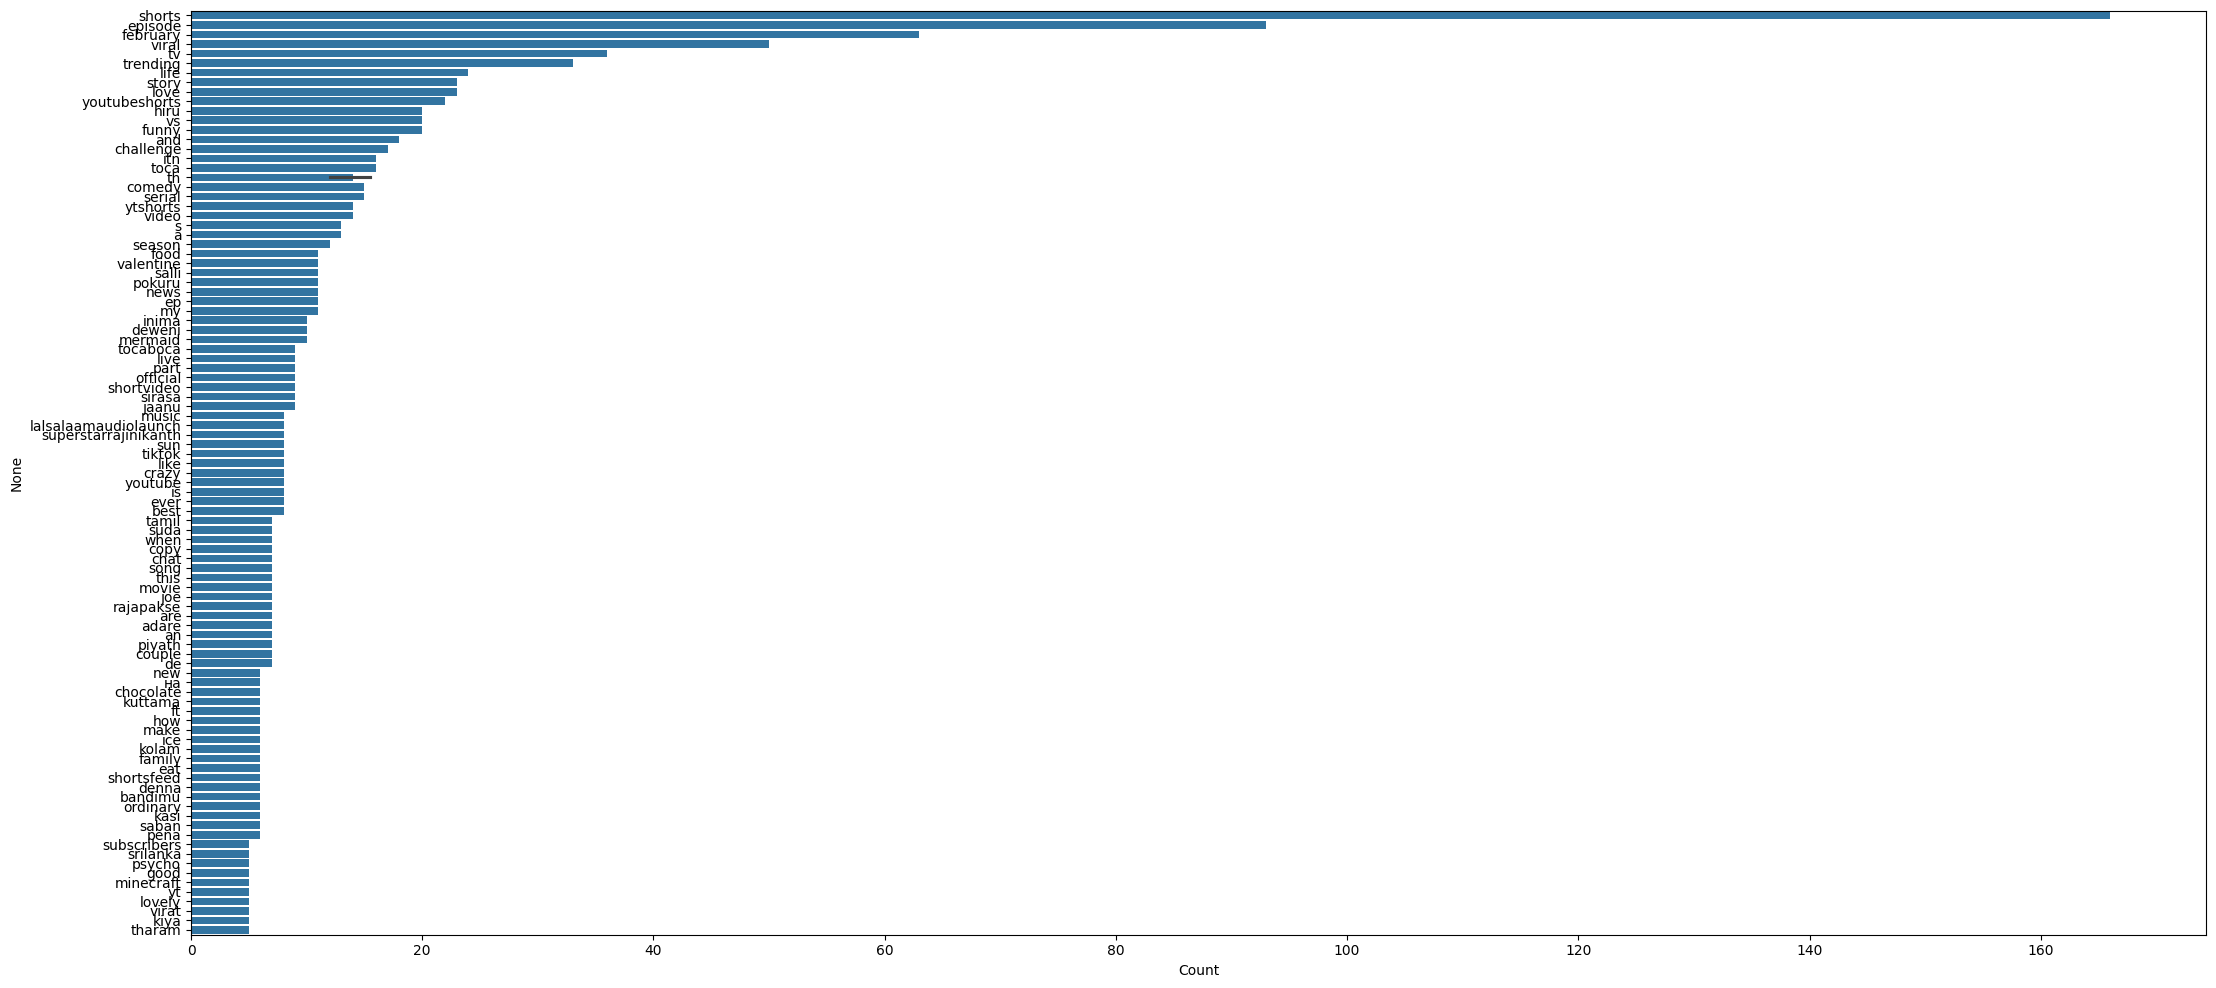

In [ ]:
plt.figure(figsize=(26, 12))
sns.barplot(data=word_counts.head(100), x = 'Count', y = word_counts.head(100).index)

In [ ]:
two_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, th february to wild food
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   1451 non-null   int64
dtypes: int64(1)
memory usage: 22.7+ KB


In [ ]:
two_words['Words'] = two_words.index

In [ ]:
two_words.reset_index(drop=True, inplace=True)

In [ ]:
two_words = two_words[['Words', 'Count']]

In [ ]:
two_words = two_words[two_words.Words != ' ']
two_words.reset_index(drop=True, inplace=True)

In [ ]:
two_words = two_words[two_words.Count > 1]

<Axes: xlabel='Count', ylabel='Words'>

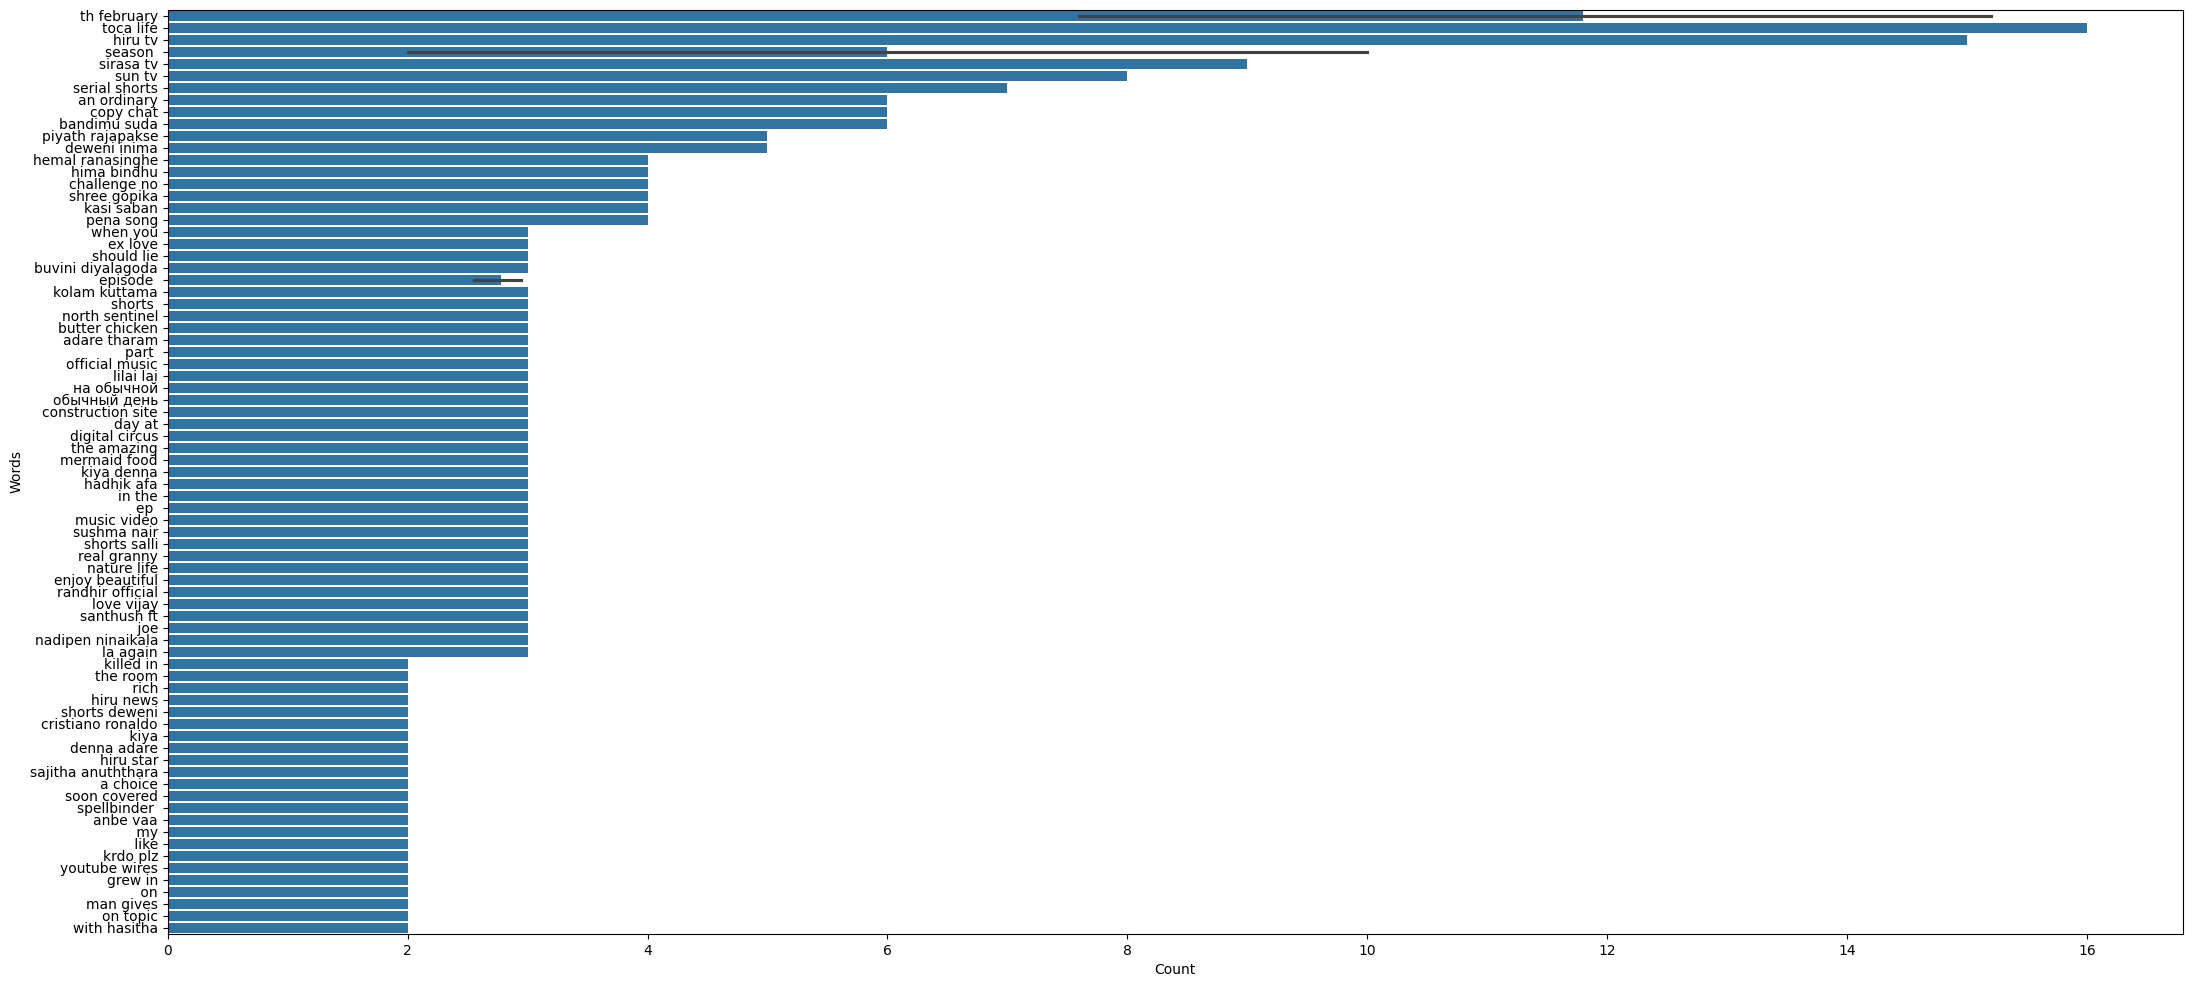

In [ ]:
plt.figure(figsize=(26, 12))
sns.barplot(data=two_words.head(100), x = 'Count', y = 'Words')

TASK 2

In [ ]:
test = df.copy()

In [ ]:
test.head()

,title,published_at,duration,view_count,like_count,comment_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,PT25S,39972377,1143891.0,8254.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,PT37S,37983493,1239925.0,2823.0
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24T05:17:00Z,PT1M1S,29605580,938530.0,691.0
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17T14:14:43Z,PT58S,22825107,438667.0,241.0
4,The success of people depends on their life co...,2024-01-24T09:00:30Z,PT56S,21029074,348898.0,1500.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          598 non-null    object 
 1   published_at   598 non-null    object 
 2   duration       598 non-null    object 
 3   view_count     598 non-null    int64  
 4   like_count     585 non-null    float64
 5   comment_count  588 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.2+ KB


In [ ]:
test.dropna(inplace=True)

In [ ]:
def extract_duration(duration):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        seconds = int(match.group(3)) if match.group(3) else 0
        return {'hours': hours, 'minutes': minutes, 'seconds': seconds}
    else:
        return {'hours': 0, 'minutes': 0, 'seconds': 0}

In [ ]:
test.duration = test.duration.astype('timedelta64[ns]')

In [ ]:
df_1 = pd.DataFrame([])
df_1[['hours', 'minutes', 'seconds']] = df['duration'].map(extract_duration).apply(pd.Series)


In [ ]:
test

,title,published_at,duration,view_count,like_count,comment_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,0 days 00:00:25,39972377,1143891.0,8254.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,0 days 00:00:37,37983493,1239925.0,2823.0
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24T05:17:00Z,0 days 00:01:01,29605580,938530.0,691.0
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17T14:14:43Z,0 days 00:00:58,22825107,438667.0,241.0
4,The success of people depends on their life co...,2024-01-24T09:00:30Z,0 days 00:00:56,21029074,348898.0,1500.0
...,...,...,...,...,...,...
593,కేసీఆర్ ఏం చేయబోతున్నడు..ముందే చెప్పేసిన మల్లన...,2024-02-20T06:23:10Z,0 days 00:07:14,109855,1969.0,257.0
594,The BEST feeling in the World!! I know I’ll mi...,2024-02-19T18:12:55Z,0 days 00:00:07,54557,4659.0,132.0
595,Chinese burger with chicken and bamboo shoots ...,2024-02-20T03:16:24Z,0 days 00:00:59,63345,7631.0,110.0
596,"АЛЁНА, БЛИН про Ксению Собчак и Дину Саеву / ...",2024-02-19T20:04:58Z,0 days 00:00:58,52786,1549.0,33.0


In [ ]:
df_1

,hours,minutes,seconds
0,0,0,25
1,0,0,37
2,0,1,1
3,0,0,58
4,0,0,56
...,...,...,...
593,0,7,14
594,0,0,7
595,0,0,59
596,0,0,58


In [ ]:
df_1 = pd.DataFrame([])
df_1[['hours', 'minutes', 'seconds']] = df['duration'].map(extract_duration).apply(pd.Series)
duration_second = pd.DataFrame([])

In [ ]:
df_1.hours = df_1.hours * 3600
df_1.minutes = df_1.minutes *60
duration_second = df_1.hours + df_1.minutes + df_1.seconds

In [ ]:
test['duration_second'] = duration_second

In [ ]:
test['duration_min'] = (test.duration_second /60).round(2)

In [ ]:
test

,title,published_at,duration,view_count,like_count,comment_count,duration_second,duration_min
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,0 days 00:00:25,39972377,1143891.0,8254.0,25,0.42
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,0 days 00:00:37,37983493,1239925.0,2823.0,37,0.62
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24T05:17:00Z,0 days 00:01:01,29605580,938530.0,691.0,61,1.02
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17T14:14:43Z,0 days 00:00:58,22825107,438667.0,241.0,58,0.97
4,The success of people depends on their life co...,2024-01-24T09:00:30Z,0 days 00:00:56,21029074,348898.0,1500.0,56,0.93
...,...,...,...,...,...,...,...,...
593,కేసీఆర్ ఏం చేయబోతున్నడు..ముందే చెప్పేసిన మల్లన...,2024-02-20T06:23:10Z,0 days 00:07:14,109855,1969.0,257.0,434,7.23
594,The BEST feeling in the World!! I know I’ll mi...,2024-02-19T18:12:55Z,0 days 00:00:07,54557,4659.0,132.0,7,0.12
595,Chinese burger with chicken and bamboo shoots ...,2024-02-20T03:16:24Z,0 days 00:00:59,63345,7631.0,110.0,59,0.98
596,"АЛЁНА, БЛИН про Ксению Собчак и Дину Саеву / ...",2024-02-19T20:04:58Z,0 days 00:00:58,52786,1549.0,33.0,58,0.97


In [ ]:
correlation = test[['view_count', 'like_count', 'comment_count', 'duration_second']].corr()

In [ ]:
correlation


,view_count,like_count,comment_count,duration_second
view_count,1.000000,0.878640,0.425475,-0.131660
like_count,0.878640,1.000000,0.539650,-0.137313
comment_count,0.425475,0.539650,1.000000,-0.028375
duration_second,-0.131660,-0.137313,-0.028375,1.000000


<Axes: >

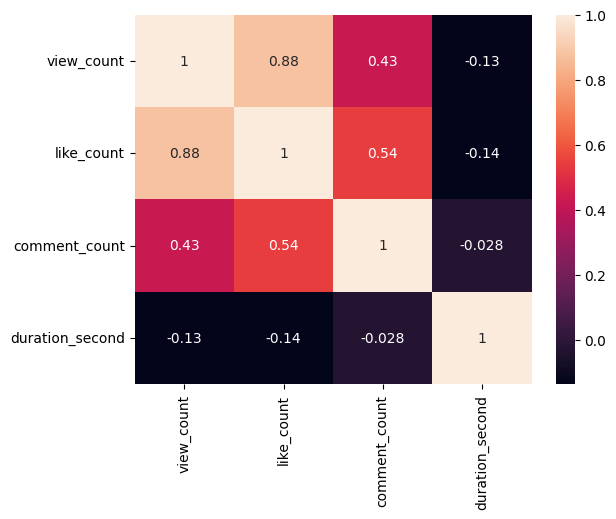

In [ ]:
sns.heatmap(correlation, annot = True)

In [ ]:
correlation = test[['view_count', 'like_count', 'comment_count', 'duration_second']].corr().view_count**2
correlation = correlation.sort_values(ascending=False)[1:]

Text(0, 0.5, 'Features')

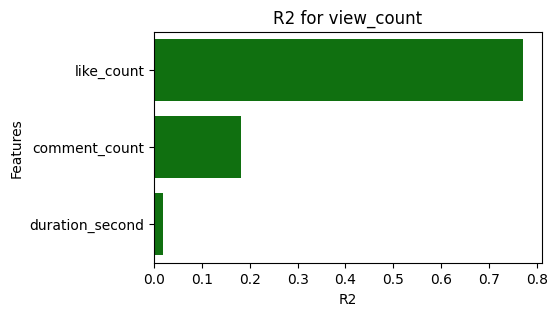

In [ ]:
plt.subplots(figsize=(5, 3))
sns.barplot(x = correlation, y=correlation.index, color='green').set_title('R2 for view_count')
plt.xlabel('R2')
plt.ylabel('Features')

In [ ]:
col = ['like_count', 'comment_count', 'duration_second']

<Axes: xlabel='duration_second', ylabel='view_count'>

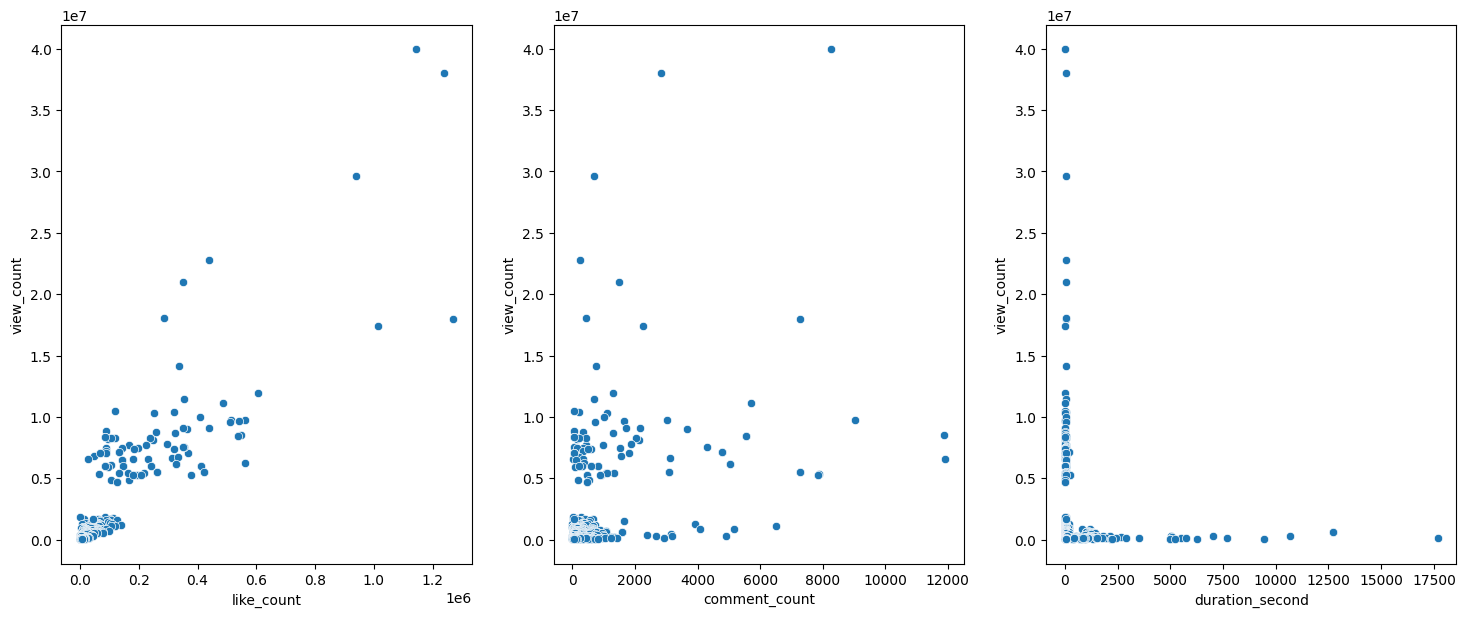

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
sns.scatterplot(x = test[col[0]], y=test.view_count, ax=ax[0])
sns.scatterplot(x = test[col[1]], y=test.view_count, ax=ax[1])
sns.scatterplot(x = test[col[2]], y=test.view_count, ax=ax[2])

In [ ]:
view_count = np.array(test.view_count)
like_count = np.array(test.like_count)
comment_count = np.array(test.comment_count)

In [ ]:
pearsonr(view_count, like_count)

PearsonRResult(statistic=0.8786396186409566, pvalue=4.196014837194057e-186)

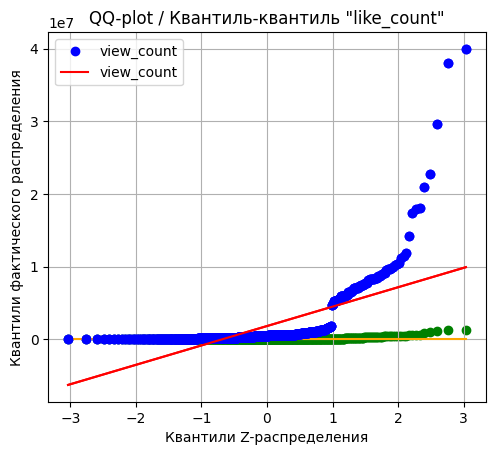

In [ ]:
# Create a figure and axis
plt.figure(figsize=[6.4*3, 4.8])
plt.subplot(1, 3, 1)

# Create Q-Q plot for view_count
norm_view = stats.probplot(view_count, dist="norm", plot=plt)

# Create Q-Q plot for like_count
norm_like = stats.probplot(like_count, dist="norm", plot=None)

# Customize the color of the markers for like_count
plt.scatter(norm_like[0][0], norm_like[0][1], color='green', marker='o', label='like_count')

# Add a line to the scatter plot
plt.plot(norm_like[0][0], norm_like[0][0], color='orange', linestyle='-', label='line')

# Add the view_count Q-Q plot back to the axis
norm_view = stats.probplot(view_count, dist="norm", plot=plt)

# Add a legend
plt.legend(['view_count', 'view_count'], loc='best')
# Add title and labels
plt.title('QQ-plot / Квантиль-квантиль "like_count"')
plt.xlabel('Квантили Z-распределения')
plt.ylabel('Квантили фактического распределения')
plt.grid(True)

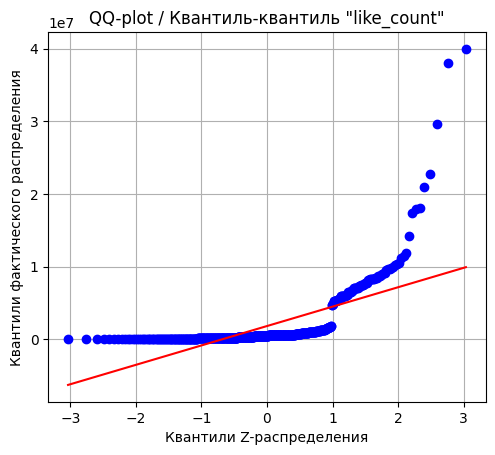

In [ ]:
plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 3, 1)
norm = stats.probplot(view_count, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль "like_count"')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)

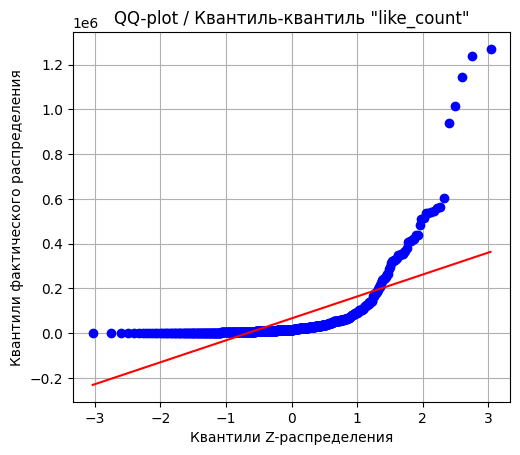

In [ ]:
plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 3, 1)
norm = stats.probplot(like_count, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль "like_count"')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)

In [ ]:
shapiro_test = stats.shapiro(like_count)
print(shapiro_test)
print('Шапиро-Уилко: Выборка распредена нормально.') if shapiro_test[1] > 0.05 else print('Шапиро-Уилко: Выборка распредена ненормально.')
print()

ShapiroResult(statistic=0.4618023633956909, pvalue=2.910760915033324e-38)
Шапиро-Уилко: Выборка распредена ненормально.



In [ ]:
shapiro_test = stats.shapiro(view_count)
print(shapiro_test)
print('Шапиро-Уилко: Выборка распредена нормально.') if shapiro_test[1] > 0.05 else print('Шапиро-Уилко: Выборка распредена ненормально.')
print()

ShapiroResult(statistic=0.4591714143753052, pvalue=2.4980387204132784e-38)
Шапиро-Уилко: Выборка распредена ненормально.



In [ ]:
mannwhitneyu(view_count,like_count)

MannwhitneyuResult(statistic=313763.0, pvalue=3.8163263983322e-153)

In [ ]:
pearsonr(view_count, comment_count)

PearsonRResult(statistic=0.4254747697667293, pvalue=1.1013173056254511e-26)

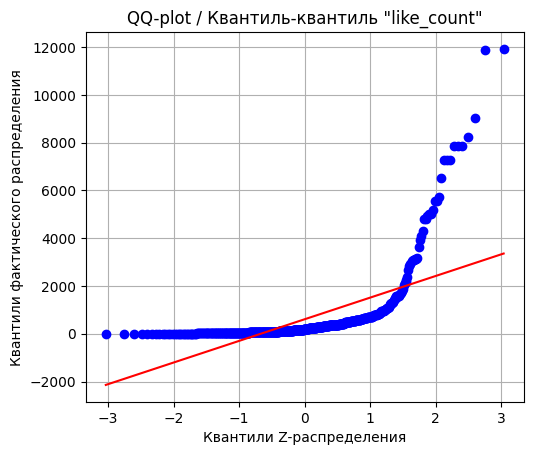

In [ ]:
plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 3, 1)
norm = stats.probplot(comment_count, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль "like_count"')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)

In [ ]:
shapiro_test = stats.shapiro(comment_count)
print(shapiro_test)
print('Шапиро-Уилко: Выборка распредена нормально.') if shapiro_test[1] > 0.05 else print('Шапиро-Уилко: Выборка распредена ненормально.')
print()

ShapiroResult(statistic=0.41982346773147583, pvalue=2.7201501322026192e-39)
Шапиро-Уилко: Выборка распредена ненормально.



In [ ]:
mannwhitneyu(view_count, comment_count)

MannwhitneyuResult(statistic=330625.0, pvalue=2.0297031622558643e-189)

In [ ]:
data = test[['view_count', 'like_count']]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
test['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


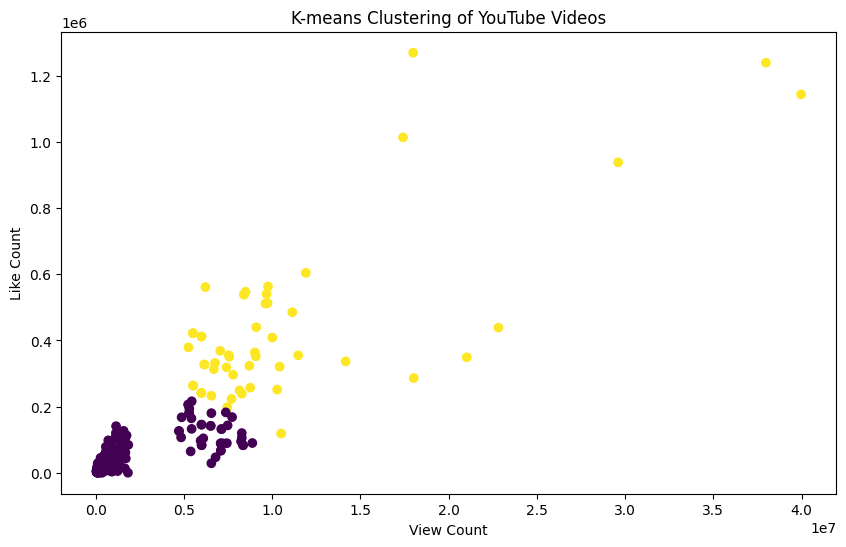

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test['view_count'], test['like_count'], c=test['Cluster'], cmap='viridis')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('K-means Clustering of YouTube Videos')
plt.show()

In [ ]:
dt = test[[ 'comment_count','view_count']]

In [ ]:
data_scaled = scaler.fit_transform(dt)

In [ ]:
data_scaled

array([[ 5.4692492 ,  9.67741121],
       [ 1.58362804,  9.1725839 ],
       [ 0.05828385,  7.04606504],
       ...,
       [-0.3573939 , -0.45247544],
       [-0.41248373, -0.45515557],
       [-0.39030471, -0.45608025]])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
test['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


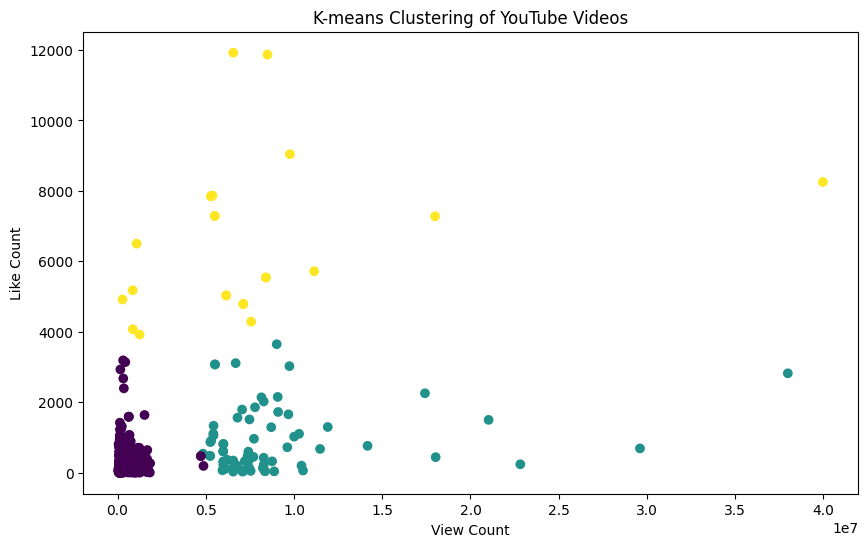

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test['view_count'], test['comment_count'], c=test['Cluster'], cmap='viridis')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('K-means Clustering of YouTube Videos')
plt.show()

In [ ]:
data3 = test[['duration_second', 'view_count']]

In [ ]:
data_scaled = scaler.fit_transform(data3)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)
test['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


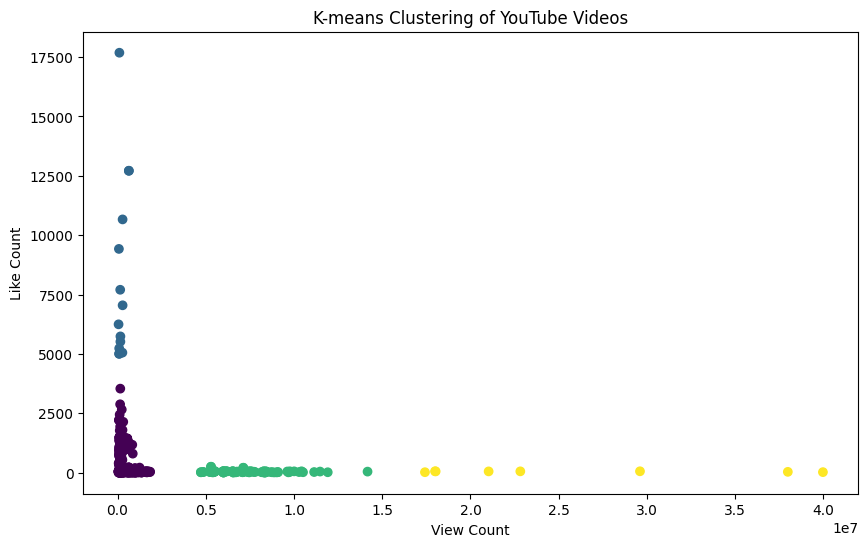

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test['view_count'], test['duration_second'], c=test['Cluster'], cmap='viridis')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('K-means Clustering of YouTube Videos')
plt.show()